# Simulador de quemador de gas

En la següent pràctica, simularem el comportament d'un cremador de gas. El cremador té un sensor de temperatura i un actuador que regula la quantitat de gas que es crema. L'objectiu és mantenir la temperatura en 100 graus centígrads. El cremador té un comportament no lineal, per la qual cosa és difícil de controlar. El controlador ha de ser capaç de mantenir la temperatura en 100 graus centígrads.

Al principi, el cremador està apagat i la temperatura és de 20 graus centígrads. El cremador s'encén i la temperatura augmenta. Quan la temperatura arriba als 100 graus centígrads, si apaguem el cremador, la temperatura disminueix. Si encenem el cremador, la temperatura augmenta i ens passem de 100 graus centígrads. Hem d'anar modificant la quantitat de gas que cremem per a mantenir la temperatura en 100 graus centígrads.


# Implementació senzilla

En primer lloc, implementarem un controlador simple que intenti mantenir la temperatura en 100 graus centígrads. El controlador serà una funció en la qual li passem la temperatura actual i ens retorna la quantitat de gas que hem de cremar (entre 0 i 100).

In [108]:
def controlador_simple(temperatura):
    # CODI DEL CONTROLADOR

## Efecte en la temperatura

Segons la quantitat de gas cremada la temperatura augmenta o disminueix. Suposarem que la temperatura augmenta 1 grau centígrad per segon si cremem 1 unitat de gas i disminueix 0.5 graus centígrads per segon si no cremem res. Els valors intermedis són proporcionals.

La funció serà la següent:

In [109]:
def temperatura(t_actual, gas):
    gas = gas / 100
    return t_actual + gas - 0.5 * (1 - gas)

# Simulem el cremador.

Ara anem a simular el cremador. El cremador té un sensor de temperatura i un actuador que regula la quantitat de gas que es crema. El cremador té un comportament no lineal, per la qual cosa és difícil de controlar. El controlador ha de ser capaç de mantenir la temperatura en 100 graus centígrads.

Visualitzem la temperatura i la quantitat de gas que cremem durant 100 segons.

100 21.0
100 22.0
100 23.0
100 24.0
100 25.0
100 26.0
100 27.0
100 28.0
100 29.0
100 30.0
100 31.0
100 32.0
100 33.0
100 34.0
100 35.0
100 36.0
100 37.0
100 38.0
100 39.0
100 40.0
100 41.0
100 42.0
100 43.0
100 44.0
100 45.0
100 46.0
100 47.0
100 48.0
100 49.0
100 50.0
100 51.0
100 52.0
100 53.0
100 54.0
100 55.0
100 56.0
100 57.0
100 58.0
100 59.0
100 60.0
100 61.0
100 62.0
100 63.0
100 64.0
100 65.0
100 66.0
100 67.0
100 68.0
100 69.0
100 70.0
50 70.25
50 70.5
50 70.75
50 71.0
50 71.25
50 71.5
50 71.75
50 72.0
50 72.25
50 72.5
50 72.75
50 73.0
50 73.25
50 73.5
50 73.75
50 74.0
50 74.25
50 74.5
50 74.75
50 75.0
50 75.25
50 75.5
50 75.75
50 76.0
50 76.25
50 76.5
50 76.75
50 77.0
50 77.25
50 77.5
50 77.75
50 78.0
50 78.25
50 78.5
50 78.75
50 79.0
50 79.25
50 79.5
50 79.75
50 80.0
50 80.25
50 80.5
50 80.75
50 81.0
50 81.25
50 81.5
50 81.75
50 82.0
50 82.25
50 82.5
50 82.75
50 83.0
50 83.25
50 83.5
50 83.75
50 84.0
50 84.25
50 84.5
50 84.75
50 85.0
50 85.25
50 85.5
50 85.75
50 86.0
50 86.

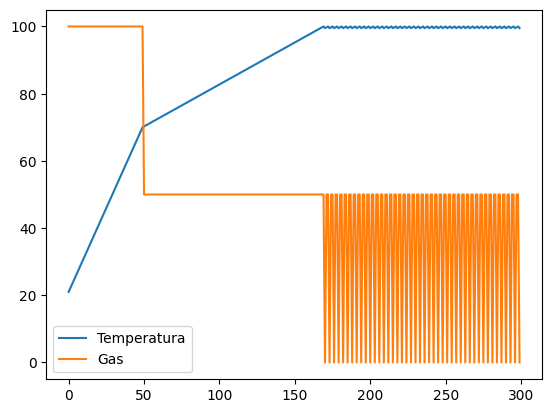

In [110]:
import matplotlib.pyplot as plt

def simulador(controlador, t_inicial=20, pasos=300):
    temps = np.zeros(pasos)
    gasos = np.zeros(pasos)
    for p in range(pasos):
        gas = controlador(t_inicial)
        t_inicial = temperatura(t_inicial, gas)
        print(gas, t_inicial)
        temps[p] = t_inicial
        gasos[p] = gas
    
    plt.plot(temps)
    plt.plot(gasos)
    plt.legend(['Temperatura', 'Gas'])
    plt.show()

simulador(controlador_simple)        

Podem veure com el sistem funciona pero no es estable. Una vegada la temperatura arriba a 100 graus, el sistema no es capaç de mantenir la temperatura en 100 graus de forma efectiva.

Anem a veure una forma més efectiva de controlar el sistema.

# Implementació en lògica difusa

La lògica difusa és l'eina perfecta per a aquest tipus de problemes. Ens permet modelar el comportament del sistema de forma intuïtiva i senzilla; retornat valors continuats en lloc de valors discrets.

Utilitzarem la llibreria scikit-fuzzy per a implementar el controlador difús. Aquesta llibreria ens permet definir els conjunts difusos, les regles difuses i la inferència de forma senzilla.

En primer lloc, definim els conjunts difusos que utilitzarem per a modelar el sistema. En aquest cas, utilitzarem quatre conjunts difusos per a modelar la temperatura: fred, apropiat, calent, molt calent i molt fred. I cinc conjunts difusos per a modelar la quantitat de gas que cremem: molt poc, poc, mitjà, molt i total.

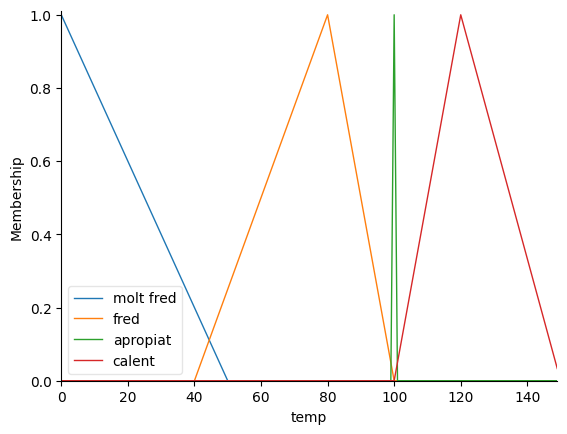

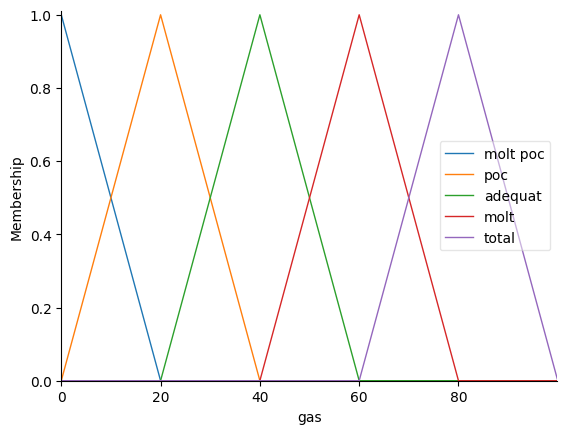

In [111]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# La temperatura objectiu estarà en el centre del conjunt apropiat
temperatura_obj = 100

# Definim l'univers del discurs 
rang_temperatura = np.arange(0, 150, 1)
rang_gas = np.arange(0, 100, 0.1)

# Definim els antecedents i els consequents
temp = ctrl.Antecedent(rang_temperatura, 'temp')
gas = ctrl.Consequent(rang_gas, 'gas')

# Definim els conjunts difusos


# Visualitzem els conjunts difusos
temp.view()
gas.view()

## Regles difuses

Ara definim les regles difuses que modelen el comportament del sistema. En aquest cas, definirem cinco regles difuses. Si la temperatura és molt fred, cremarem tot el gas. Si la temperatura és fred, cremarem molt gas. Si la temperatura és apropiada, cremarem una quantitat adequada de gas. Si la temperatura és calent, cremarem poc gas. Si la temperatura és molt calent, cremarem molt poc gas.

## Inferència difusa

Ara definim el controlador difús. El controlador difús és un sistema difús que utilitza les regles difuses per a inferir el valor de la sortida. En aquest cas, el controlador difús utilitza les regles difuses per a inferir la quantitat de gas que hem de cremar per a mantenir la temperatura en 100 graus centígrads.


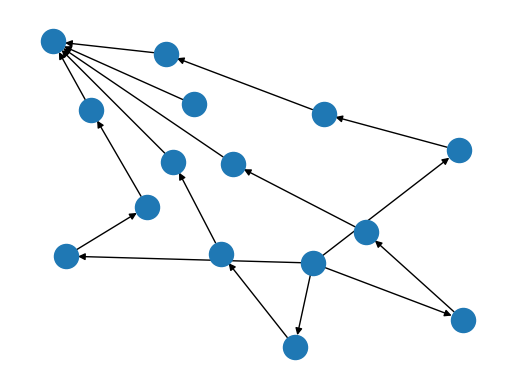

In [114]:
controlador_simulador = ctrl.ControlSystemSimulation(controlador)

79.99970336860154 20.699995550529025
79.99969928892038 21.39999103986283
79.99969494912807 22.09998646409975
79.99969033145005 22.7999818190715
79.99968541621061 23.49997710031466
79.99968018158575 24.199972303038447
79.9996746033146 24.899967422088164
79.99966865436352 25.599962451903618
79.99966230453057 26.299957386471576
79.99965551998328 26.999952219271325
79.9996482627039 27.699946943211884
79.99964048984266 28.399941550559525
79.9996321529308 29.099936032853485
79.99962319694698 29.79993038080769
79.99961355918278 30.499924584195433
79.9996031678661 31.199918631713423
79.99959194047636 31.89991251082057
79.99957978166823 32.599906207545594
79.99956658069618 33.299899706256035
79.99955220818705 33.99989298937884
79.99953651206982 34.69988603705989
79.99951931238525 35.39987882674567
79.99950039460315 36.09987133266472
79.99947950091745 36.79986352517848
79.99945631877927 37.49985536996017
79.99943046556619 38.19984682694366
79.9994014678057 38.89983784896075
79.99936873252648 39.

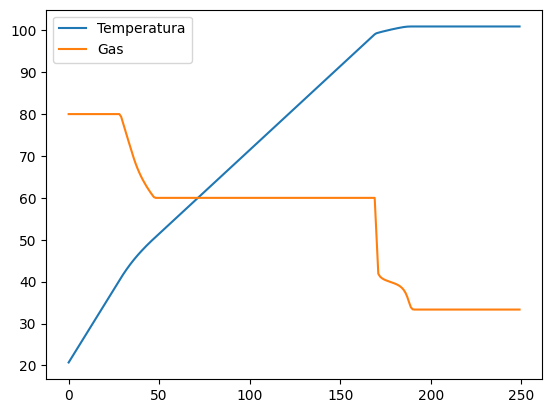

In [115]:
# Simulem el controlador difús

def controlador_difuso(temperatura):
    controlador_simulador.input['temp'] = temperatura
    controlador_simulador.compute()
    return controlador_simulador.output['gas']

simulador(controlador_difuso, 20, 250)

# Plantejament alternatiu

Un plantejament semblant pero amb un resultat diferent seria el següent: com a entrada rebrem l'error de temperatura (la diferència entre la temperatura actual i la temperatura objectiu). Com a sortida, retornarem la quantitat de gas que hem de cremar.

La diferència entre aquest plantejament i el plantejament anterior és que en aquest cas, el controlador difús no ha de saber quina és la temperatura actual. Només ha de saber quina és la diferència entre la temperatura actual i la temperatura objectiu. També el farà més flexible i fàcil de reutilitzar.

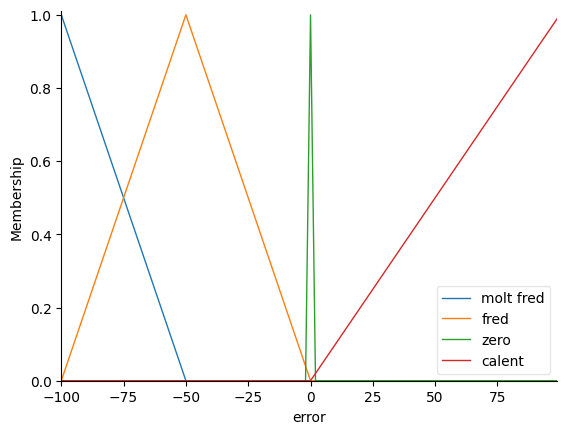

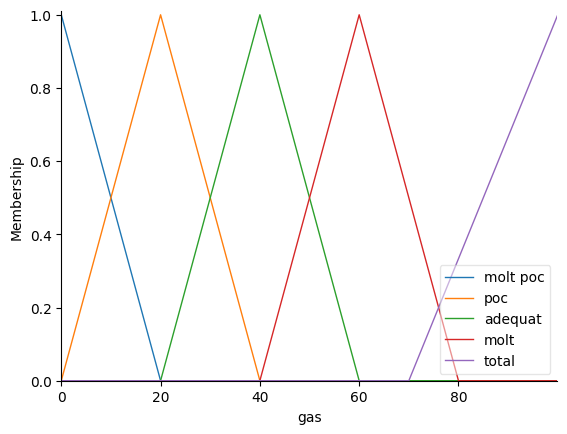

In [116]:
# Definim l'univers del discurs

temperatura_objectiu = 100

rang_error = np.arange(-temperatura_objectiu, temperatura_objectiu, 1)
rang_gas = np.arange(0, 100, 0.1)

# Definim els antecedents i els consequents
error = ctrl.Antecedent(rang_error, 'error')
gas = ctrl.Consequent(rang_gas, 'gas')

# Definim els conjunts difusos
error['molt fred'] = fuzz.trimf(rang_error, [-temperatura_objectiu, -temperatura_objectiu, -temperatura_objectiu / 2])
error['fred'] = fuzz.trimf(rang_error, [-temperatura_objectiu  , -temperatura_objectiu / 2, 0])
error['zero'] = fuzz.trimf(rang_error, [-2, 0, 2])
error['calent'] = fuzz.trimf(rang_error, [0, temperatura_objectiu, temperatura_objectiu])

gas['molt poc'] = fuzz.trimf(rang_gas, [0, 0, 20])
gas['poc'] = fuzz.trimf(rang_gas, [0, 20, 40])
gas['adequat'] = fuzz.trimf(rang_gas, [20, 40, 60])
gas['molt'] = fuzz.trimf(rang_gas, [40, 60, 80])
gas['total'] = fuzz.trimf(rang_gas, [70, 100, 120])

# Visualitzem els conjunts difusos
error.view()
gas.view()

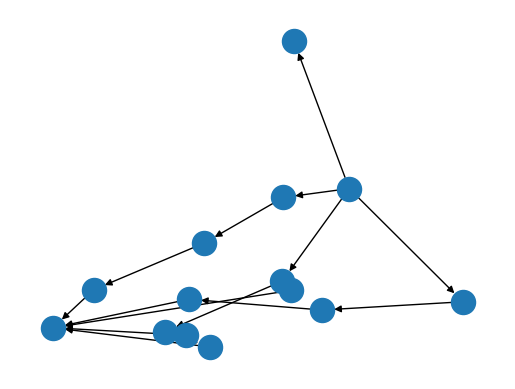

In [117]:
# Definim les regles difuses
regla1 = ctrl.Rule(error['fred'], gas['total'])
regla2 = ctrl.Rule(error['zero'], gas['adequat'])
regla3 = ctrl.Rule(error['calent'], gas['molt poc'])

# Definim el controlador difús
controlador = ctrl.ControlSystem([regla1, regla2, regla3])
controlador.view()

87.69895397489567 20.815484309623436
87.79757445999121 21.632447926523305
87.8950225753918 22.450873265154183
87.99124587594876 23.270741953293413
88.08618961861264 24.0920347975726
88.17979664008173 24.91473174717383
88.27200722671579 25.738811855574564
88.36275897614222 26.564253240216697
88.45198664995868 27.39103303996608
88.53962201685002 28.21912737021883
88.62559368542885 29.04851127550026
88.70982692599995 29.87915867939026
88.79224348042524 30.71104233159664
88.87276135916547 31.544133751984123
88.95129462451067 32.378403171351785
89.02775315892173 33.213819468735615
89.1020424173163 34.05035010499536
89.17406316201283 34.88796105242555
89.24371117896345 35.72661672011
89.31087697375241 36.56627987471629
89.37544544572305 37.406911556402136
89.43729553843777 38.248470989478704
89.49629986451761 39.090915487446466
89.55232430272575 39.93420035198735
89.60522756496898 40.778278765461884
89.65486073067143 41.62310167642195
89.70106674574 42.46861767760805
89.74367988309054 43.314

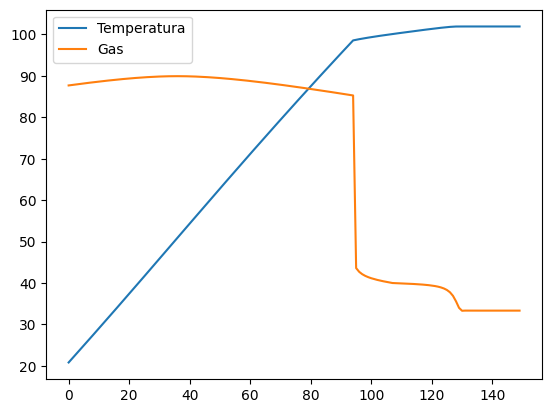

In [118]:
# Simulem el controlador difús

controlador_simulador = ctrl.ControlSystemSimulation(controlador)

def controlador_difus(temperatura):
    controlador_simulador.input['error'] = temperatura - temperatura_objectiu
    controlador_simulador.compute()
    return controlador_simulador.output['gas']

simulador(controlador_difus, 20, 150)